In [1]:
import sys, os
from icecube import icetray, dataclasses, dataio
from I3Tray import I3Tray
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import random 

gcdFile = dataio.I3File('/cvmfs/icecube.opensciencegrid.org/data/GCD/GeoCalibDetectorStatus_2020.Run134142.Pass2_V0.i3.gz')
frame = gcdFile.pop_frame()

while not frame.Has('I3Geometry'):
    frame = gcdFile.pop_frame()
geometry = frame.Get('I3Geometry')
om_geometry = geometry.omgeo

dom_x_positions=np.zeros((87,67))
dom_y_positions=np.zeros((87,67))
dom_z_positions=np.zeros((87,67))

for om, geo_info in om_geometry:
    dom_x_positions[om[0],om[1]]=geo_info.position.x
    dom_y_positions[om[0],om[1]]=geo_info.position.y
    dom_z_positions[om[0],om[1]]=geo_info.position.z
    
#places the selected string numbers of x, y, z positions into a new array
gen2_dom_x_positions = np.concatenate((dom_x_positions[1:6:2], dom_x_positions[14:21:2], dom_x_positions[31:40:2], dom_x_positions[51:60:2], dom_x_positions[68:75:2]))
gen2_dom_y_positions = np.concatenate((dom_y_positions[1:6:2], dom_y_positions[14:21:2], dom_y_positions[31:40:2], dom_y_positions[51:60:2], dom_y_positions[68:75:2]))
gen2_dom_z_positions = np.concatenate((dom_z_positions[1:6:2], dom_z_positions[14:21:2], dom_z_positions[31:40:2], dom_z_positions[51:60:2], dom_z_positions[68:75:2]))


## Creating x-y positions using a random distribution based on the bounds of the original IceCube coordinates

In [2]:
#used to set the range for random.uniform()
print(np.max(gen2_dom_x_positions))
print(np.min(gen2_dom_x_positions))
print(np.max(gen2_dom_y_positions))
print(np.min(gen2_dom_y_positions))

525.42
-570.9
463.72
-521.08


### initial code to generate random x,y coords for each dom using random.uniform()

In [3]:
#using random.uniform()
#creates a (21,67) 2d array with randomized x positions in a the range of original IC coordinates
index = 0
rand_x_positions = []
for string_num in gen2_dom_x_positions:
    for dom_num in string_num:
        dom_num = random.uniform(-600., 550.)
        rand_x_positions.insert(index, dom_num)
        index = index + 1
#splits the 1d list in to 21 sections of length 67 
splitedSize = 67
rand_dom_x_list_1 = [rand_x_positions[x:x+splitedSize] for x in range(0, len(rand_x_positions), splitedSize)]
#converts list to array
rand_dom_x_positions = np.asarray(rand_dom_x_list_1)

print(len(rand_dom_x_positions))
print(len(rand_dom_x_positions[0]))
#print(rand_dom_x_positions)

21
67


In [4]:
#using random.uniform()
#creates a (21,67) 2d array with randomized y positions in a the range of original IC coordinates 
index = 0
rand_y_positions = []
for string_num in gen2_dom_y_positions:
    for dom_num in string_num:
        dom_num = random.uniform(-550., 500.)
        rand_y_positions.insert(index, dom_num)
        index = index + 1
#splits the 1d list in to 21 sections of length 67 
splitedSize = 67
rand_dom_y_list_1 = [rand_y_positions[y:y+splitedSize] for y in range(0, len(rand_y_positions), splitedSize)]
#converts list to array
rand_dom_y_positions = np.asarray(rand_dom_y_list_1)

print(len(rand_dom_y_positions))
print(len(rand_dom_y_positions[0]))
#print(rand_dom_y_positions)


21
67


### a function that generates random x, y coordinates for each dom using random.uniform()

In [5]:
#creates random x,y positions for each dom
def uniform_random(low, high, coordinate_array, split):
    index = 0
    rand_uniform_positions = []
    for string_num in coordinate_array:
        for dom_num in string_num:
            dom_num = random.uniform(low, high)
            rand_uniform_positions.insert(index, dom_num)
            index = index + 1 
    rand_dom_list = [rand_uniform_positions[x:x+split] for x in range(0, len(rand_uniform_positions), split)]
    rand_uni_dom_positions = np.asarray(rand_dom_list)
    return rand_uni_dom_positions

### a function that generates random x,y coordinates for each string using random.uniform()

In [6]:
#creates random x,y positions for each string
def uniform_random_string(low, high, coordinate_array, split):
    index = 0
    rand_uniform_positions = []
    for string_num in coordinate_array:
        string_num = random.uniform(low, high)
        rand_uniform_positions = np.insert(rand_uniform_positions,index, string_num)
        index = index + 1
        
    rand_uniform_positions = np.repeat(rand_uniform_positions, 67)    
    rand_dom_list = [rand_uniform_positions[x:x+split] for x in range(0, len(rand_uniform_positions), split)]
    rand_uni_positions = np.asarray(rand_dom_list)
    return rand_uni_positions

In [33]:
rand_x_positions = uniform_random_string(-600., 550, gen2_dom_x_positions, 67)
rand_y_positions = uniform_random_string(-600., 550, gen2_dom_y_positions, 67)
print(rand_x_positions)
print(len(rand_x_positions))
#print(type(rand_dom_x_positions2))
print(len(rand_x_positions[0]))

[[ 326.14693703  326.14693703  326.14693703 ...  326.14693703
   326.14693703  326.14693703]
 [-334.63358509 -334.63358509 -334.63358509 ... -334.63358509
  -334.63358509 -334.63358509]
 [ -27.5437747   -27.5437747   -27.5437747  ...  -27.5437747
   -27.5437747   -27.5437747 ]
 ...
 [-115.56932298 -115.56932298 -115.56932298 ... -115.56932298
  -115.56932298 -115.56932298]
 [ 490.81970005  490.81970005  490.81970005 ...  490.81970005
   490.81970005  490.81970005]
 [ 414.44285263  414.44285263  414.44285263 ...  414.44285263
   414.44285263  414.44285263]]
21
67


### plots of randomly generated x,y coords for each dom using random.uniform()

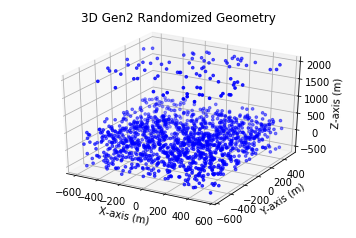

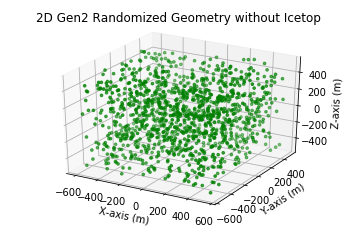

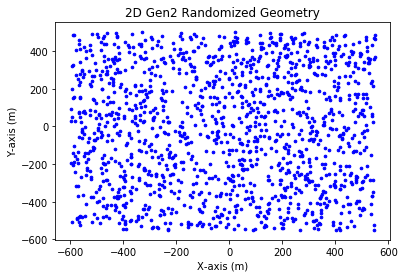

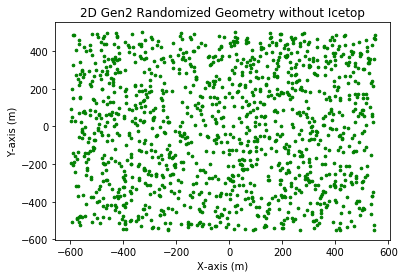

In [8]:
ax1 = plt.axes(projection='3d')
ax1.set_xlabel('X-axis (m)')
ax1.set_ylabel('Y-axis (m)')
ax1.set_zlabel('Z-axis (m)')
ax1.set_title("3D Gen2 Randomized Geometry")
ax1.dist = 11
ax1.scatter3D(rand_dom_x_positions, rand_dom_y_positions, gen2_dom_z_positions, s =7, c='blue', depthshade=True)
plt.show()

#gen2 random x-y positions, z kept constant, without icetop
ax2 = plt.axes(projection='3d')
ax2.set_xlabel('X-axis (m)')
ax2.set_ylabel('Y-axis (m)')
ax2.set_zlabel('Z-axis (m)')
ax2.set_title("2D Gen2 Randomized Geometry without Icetop")
ax2.dist = 11
ax2.scatter3D(rand_dom_x_positions[:,0:61], rand_dom_y_positions[:,0:61], gen2_dom_z_positions[:,0:61], s= 7,c='green', depthshade=True)
plt.show()

ax3 = plt.axes()
ax3.set_xlabel('X-axis (m)')
ax3.set_ylabel('Y-axis (m)')
ax3.set_title("2D Gen2 Randomized Geometry")
ax3.scatter(rand_dom_x_positions, rand_dom_y_positions, s=7, c='blue')
plt.show()

#gen2 positions without icetop
ax4 = plt.axes()
ax4.set_xlabel('X-axis (m)')
ax4.set_ylabel('Y-axis (m)')
ax4.set_title("2D Gen2 Randomized Geometry without Icetop") 
ax4.scatter(rand_dom_x_positions[:,0:61], rand_dom_y_positions[:,0:61],s=7, c='green')
plt.show()

### function to plot 3D geometry with icetop

In [52]:
""" x: choosen x cooordinates
     y: choosen y coordinates
     z: choosen z coordinates
     random_gen: random number generator used to create x,y coordinates
"""
def plot_3d_icetop(x, y, z, random_gen):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.set_xlabel('X-axis (m)')
    ax.set_ylabel('Y-axis (m)')
    ax.set_zlabel('Z-axis (m)')
    ax.set_title("3D Gen2 Randomized Geometry with IceTop \n" + random_gen) 
    ax.dist = 11
    ax.scatter3D(x, y, z, s =7, c='blue', depthshade=True)
    return fig
    

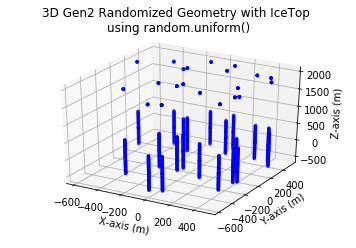

In [66]:
fig1 = plot_3d_icetop(rand_dom_x_positions, rand_dom_y_positions, gen2_dom_z_positions, "using random.uniform()")

### function to plot 3d geometry without icetop

In [64]:
""" x: choosen x cooordinates
     y: choosen y coordinates
     z: choosen z coordinates
     random_gen: random number generator used to create x,y coordinates
"""
def plot_3d_no_icetop(x, y, z, random_gen):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.set_xlabel('X-axis (m)')
    ax.set_ylabel('Y-axis (m)')
    ax.set_zlabel('Z-axis (m)')
    ax.set_title("3D Gen2 Randomized Geometry without IceTop \n" + random_gen) 
    ax.dist = 11
    ax.scatter3D(x[:,0:61], y[:,0:61], z[:,0:61], s =7, c='green', depthshade=True)
    return fig
    

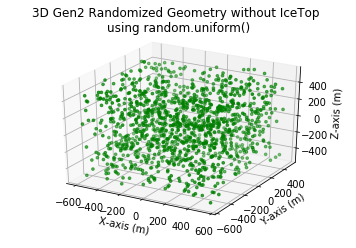

In [65]:
fig2 = plot_3d_no_icetop(rand_dom_x_positions, rand_dom_y_positions, gen2_dom_z_positions, "using random.uniform()")

### function to plot 2d geometry with icetop

In [58]:
"""  x: choosen x cooordinates
     y: choosen y coordinates
     random_gen: random number generator used to create x,y coordinates
"""
def plot_2d_icetop(x, y, random_gen):
    fig = plt.figure()
    ax = plt.axes()
    ax.set_xlabel('X-axis (m)')
    ax.set_ylabel('Y-axis (m)')
    ax.set_title("2D Gen2 Randomized Geometry with IceTop \n" + random_gen) 
    ax.scatter(x, y, s =7, c='blue')
    return fig
    

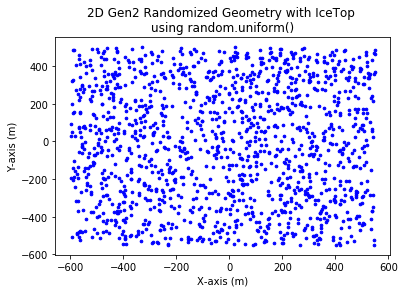

In [59]:
fig3 = plot_2d_icetop(rand_dom_x_positions, rand_dom_y_positions, "using random.uniform()")

### function to plot 2d geometry without icetop

In [62]:
"""  x: choosen x cooordinates
     y: choosen y coordinates
     random_gen: random number generator used to create x,y coordinates
"""
def plot_2d_no_icetop(x, y, random_gen):
    fig = plt.figure()
    ax = plt.axes()
    ax.set_xlabel('X-axis (m)')
    ax.set_ylabel('Y-axis (m)')
    ax.set_title("2D Gen2 Randomized Geometry without IceTop \n" + random_gen) 
    ax.scatter(x, y, s =7, c='green')
    return fig
    

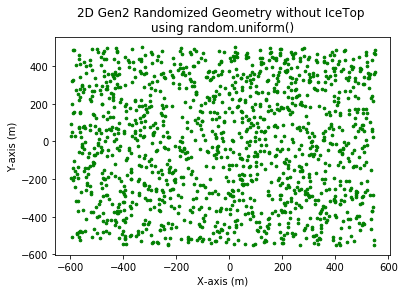

In [63]:
fig4 = plot_2d_no_icetop(rand_dom_x_positions, rand_dom_y_positions, "using random.uniform()")

## Creating x-y positions using a triangular distribution based on the upper and lower bounds of the original IceCube coordinates 

### initial code to generate random x,y coords for each dom using random.triangular()

In [9]:
#using random.triangular()
#creates a (21,67) 2d array with randomized x positions in a the range of original IC coordinates 
index = 0
rand_x_positions_2 = []
for string_num in gen2_dom_x_positions:
    for dom_num in string_num:
        dom_num = random.triangular(-600., 550.)
        rand_x_positions_2.insert(index, dom_num)
        index = index + 1
#splits the 1d list in to 21 sections of length 67 
splitedSize = 67
rand_dom_x_list_2 = [rand_x_positions_2[x:x+splitedSize] for x in range(0, len(rand_x_positions_2), splitedSize)]
#converts list to array
rand_dom_x_positions_2 = np.asarray(rand_dom_x_list_2)

print(len(rand_dom_x_positions_2))
print(len(rand_dom_x_positions_2[0]))
#print(rand_dom_x_positions)

21
67


In [10]:
#using random.triangular()
#creates a (21,67) 2d array with randomized x positions in a the range of original IC coordinates 
index = 0
rand_y_positions_2 = []
for string_num in gen2_dom_y_positions:
    for dom_num in string_num:
        dom_num = random.triangular(-600., 550.)
        rand_y_positions_2.insert(index, dom_num)
        index = index + 1
#splits the 1d list in to 21 sections of length 67 
splitedSize = 67
rand_dom_y_list_2 = [rand_y_positions_2[x:x+splitedSize] for x in range(0, len(rand_y_positions_2), splitedSize)]
#converts list to array
rand_dom_y_positions_2 = np.asarray(rand_dom_y_list_2)

print(len(rand_dom_y_positions_2))
print(len(rand_dom_y_positions_2[0]))
#print(rand_dom_y_positions)

21
67


### a function that generates random x, y coordinates for each dom using random.triangular()

In [11]:
def triangular_random(low, high, coordinate_array, split):
    index = 0
    rand_triangular_positions = []
    for string_num in coordinate_array:
        for dom_num in string_num:
            dom_num = random.triangular(low, high)
            rand_triangular_positions.insert(index, dom_num)
            index = index + 1 
    rand_dom_list = [rand_triangular_positions[x:x+split] for x in range(0, len(rand_triangular_positions), split)]
    rand_trian_dom_positions = np.asarray(rand_dom_list)
    return rand_trian_dom_positions

In [12]:
rand_dom_x_positions3 = triangular_random(-600., 550, gen2_dom_x_positions, 67)
print(rand_dom_x_positions3)
print(len(rand_dom_x_positions3))
print(len(rand_dom_x_positions3[0]))

[[  77.24151135 -244.9154047   -20.95166034 ...  277.12140164
  -192.21933921  158.02297686]
 [ 167.92507719  105.45651369 -126.2604222  ...  193.50079176
  -125.34382561   56.7518059 ]
 [-124.35914378 -229.24025305  134.29429948 ... -121.13712241
  -522.11096907  185.49394256]
 ...
 [-117.80098697 -164.09698876   16.79895066 ...  -33.40395091
  -147.45551728 -327.99221386]
 [ 483.50940181  -79.71796281   56.89950026 ... -333.51757775
  -482.80244725 -316.16209135]
 [  30.3973967    81.5615313   187.20275013 ...  252.97008096
    16.71189694 -335.01317431]]
21
67


### a function that generates random x,y coordinates for each string using random.triangular()

In [13]:
#creates random x,y positions for each string
def triangular_random_string(low, high, coordinate_array, split):
    index = 0
    rand_triangular_positions = []
    for string_num in coordinate_array:
        string_num = random.triangular(low, high)
        rand_triangular_positions = np.insert(rand_triangular_positions,index, string_num)
        index = index + 1
        
    rand_triangular_positions = np.repeat(rand_triangular_positions, 67)    
    random_list = [rand_triangular_positions[x:x+split] for x in range(0, len(rand_triangular_positions), split)]
    rand_tri_positions = np.asarray(random_list)
    return rand_tri_positions

In [32]:
rand_x_positions = uniform_random_string(-600., 550, gen2_dom_x_positions, 67)
rand_y_positions = uniform_random_string(-600., 550, gen2_dom_y_positions, 67)
print(rand_x_positions)
print(len(rand_x_positions))
#print(type(rand_dom_x_positions2))
print(len(rand_x_positions[0]))

[[ 290.54627485  290.54627485  290.54627485 ...  290.54627485
   290.54627485  290.54627485]
 [ 530.8375524   530.8375524   530.8375524  ...  530.8375524
   530.8375524   530.8375524 ]
 [-399.24370863 -399.24370863 -399.24370863 ... -399.24370863
  -399.24370863 -399.24370863]
 ...
 [ 314.74506528  314.74506528  314.74506528 ...  314.74506528
   314.74506528  314.74506528]
 [ 466.75750666  466.75750666  466.75750666 ...  466.75750666
   466.75750666  466.75750666]
 [-327.09732546 -327.09732546 -327.09732546 ... -327.09732546
  -327.09732546 -327.09732546]]
21
67


### plots of randomly generated x,y coords for each dom using random.triangular()

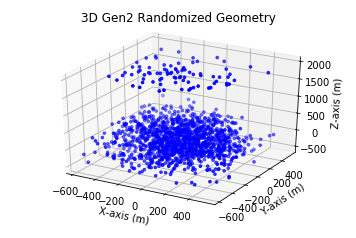

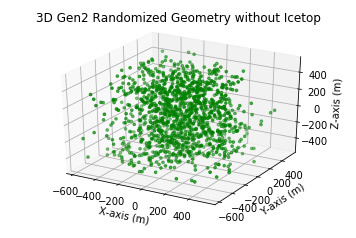

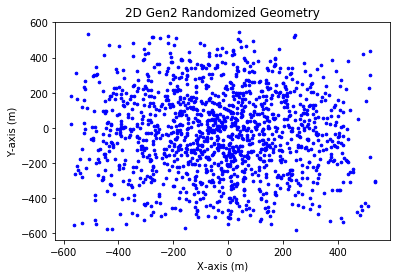

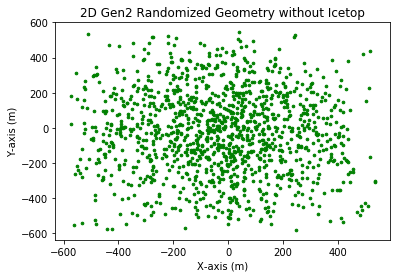

In [15]:
#using random.triangular()

ax5 = plt.axes(projection='3d')
ax5.set_xlabel('X-axis (m)')
ax5.set_ylabel('Y-axis (m)')
ax5.set_zlabel('Z-axis (m)')
ax5.set_title("3D Gen2 Randomized Geometry")
ax5.dist = 11
ax5.scatter3D(rand_dom_x_positions_2, rand_dom_y_positions_2, gen2_dom_z_positions, s =7, c='blue', depthshade=True)
plt.show()

#gen2 random x-y positions, z kept constant, without icetop
ax6 = plt.axes(projection='3d')
ax6.set_xlabel('X-axis (m)')
ax6.set_ylabel('Y-axis (m)')
ax6.set_zlabel('Z-axis (m)')
ax6.set_title("3D Gen2 Randomized Geometry without Icetop")
ax6.dist = 11
ax6.scatter3D(rand_dom_x_positions_2[:,0:61], rand_dom_y_positions_2[:,0:61], gen2_dom_z_positions[:,0:61],s =7, c='green', depthshade=True)
plt.show()

ax6 = plt.axes()
ax6.set_xlabel('X-axis (m)')
ax6.set_ylabel('Y-axis (m)')
ax6.set_title("2D Gen2 Randomized Geometry")
ax6.scatter(rand_dom_x_positions_2, rand_dom_y_positions_2, s =7, c='blue')
plt.show()

#gen2 positions without icetop
ax7 = plt.axes()
ax7.set_xlabel('X-axis (m)')
ax7.set_ylabel('Y-axis (m)')
ax7.set_title("2D Gen2 Randomized Geometry without Icetop") 
ax7.scatter(rand_dom_x_positions_2[:,0:61], rand_dom_y_positions_2[:,0:61], s =7, c='green')
plt.show()

## Creating x-y positions using a gaussian distribution based on the average and standard deviation of the original IceCube coordinates excluding Icetop

In [16]:
print(np.std(gen2_dom_x_positions[:,0:61]))
print(np.std(gen2_dom_y_positions[:,0:61]))
print(np.average(gen2_dom_x_positions[:,0:61]))
print(np.average(gen2_dom_y_positions[:,0:61]))

303.7535091613165
292.64916272585197
-28.50023419203746
-15.591569086651022


In [17]:
print(random.gauss(np.average(gen2_dom_x_positions[:,0:61]), np.std(gen2_dom_x_positions[:,0:61])))
print(random.gauss(np.average(gen2_dom_y_positions[:,0:61]), np.std(gen2_dom_y_positions[:,0:61])))

-161.84497283973747
122.4119069623303


In [18]:
#using random.gauss()
#creates a (21,67) 2d array with randomized x positions in a the range of original IC coordinates 
index = 0
rand_x_positions_3 = []
for string_num in gen2_dom_x_positions:
    for dom_num in string_num:
        dom_num = random.gauss(np.average(gen2_dom_x_positions[:,0:61]), np.std(gen2_dom_x_positions[:,0:61]))
        rand_x_positions_3.insert(index, dom_num)
        index = index + 1
#splits the 1d list in to 21 sections of length 67 
splitedSize = 67
rand_dom_x_list_3 = [rand_x_positions_3[x:x+splitedSize] for x in range(0, len(rand_x_positions_3), splitedSize)]
#converts list to array
rand_dom_x_positions_3 = np.asarray(rand_dom_x_list_3)

print(len(rand_dom_x_positions_3))
print(len(rand_dom_x_positions_3[0]))
#print(rand_dom_x_positions_3)

21
67


In [19]:
#using random.gauss()
#creates a (21,67) 2d array with randomized y positions in a the range of original IC coordinates 
index = 0
rand_y_positions_3 = []
for string_num in gen2_dom_y_positions:
    for dom_num in string_num:
        dom_num = random.gauss(np.average(gen2_dom_y_positions[:,0:61]), np.std(gen2_dom_y_positions[:,0:61]))
        rand_y_positions_3.insert(index, dom_num)
        index = index + 1
#splits the 1d list in to 21 sections of length 67 
splitedSize = 67
rand_dom_y_list_3 = [rand_y_positions_3[y:y+splitedSize] for y in range(0, len(rand_y_positions_3), splitedSize)]
#converts list to array
rand_dom_y_positions_3 = np.asarray(rand_dom_y_list_3)

print(len(rand_dom_y_positions_3))
print(len(rand_dom_y_positions_3[0]))
print(type(rand_dom_y_positions_3))
#print(rand_dom_y_positions_3)

21
67
<class 'numpy.ndarray'>


### a function that generates random x, y coordinates for each dom using random.triangular()
- the function is returning a list inside an array
- unsure of why the function does this 

In [20]:
def gauss_random(coordinate_array, split):
    index = 0
    rand_gauss_positions = []
    for string_num in coordinate_array:
        for dom_num in string_num:
            dom_num = random.gauss(np.average(coordinate_array), np.std(coordinate_array))
            rand_gauss_positions.insert(index, dom_num)
            index = index + 1
    np.asarray(rand_gauss_positions)        
    rand_gauss_dom_positions = [rand_gauss_positions[x:x+split] for x in range(0, len(rand_gauss_positions), split)]
    #print(type(rand_dom_list))
    print("rand_gauss_positions[1] is of type:")
    print(type(rand_gauss_dom_positions[1]))
    return rand_gauss_dom_positions

In [21]:
rand_dom_x_positions_4 = gauss_random(gen2_dom_x_positions[:,0:61], 67)
print("rand_dom_x_positions_4 is of type:")
print(type(rand_dom_x_positions_4))
#print(rand_dom_x_positions_4)
print(len(rand_dom_x_positions_4[0]))
#np.asarray(rand_dom_x_positions_4)

rand_gauss_positions[1] is of type:
<class 'list'>
rand_dom_x_positions_4 is of type:
<class 'list'>
67


### a function that generates random x,y coordinates for each string using random.gauss()

In [22]:
#creates random x,y positions for each string
def gauss_random_string(coordinate_array, split):
    index = 0
    rand_gauss_positions = []
    for string_num in coordinate_array:
        string_num = random.gauss(np.average(coordinate_array), np.std(coordinate_array))
        rand_gauss_positions = np.insert(rand_gauss_positions,index, string_num)
        index = index + 1
        
    rand_gauss_positions = np.repeat(rand_gauss_positions, 67)    
    random_list = [rand_gauss_positions[x:x+split] for x in range(0, len(rand_gauss_positions), split)]
    rand_gau_positions = np.asarray(random_list)
    return rand_gau_positions

In [31]:
rand_x_positions = gauss_random_string(gen2_dom_x_positions, 67)
rand_y_positions = gauss_random_string(gen2_dom_y_positions, 67)
print(rand_x_positions)
print(len(rand_x_positions))
#print(type(rand_x_positions[1]))
print(len(rand_x_positions[0]))

[[ -91.60358097  -91.60358097  -91.60358097 ...  -91.60358097
   -91.60358097  -91.60358097]
 [ 500.5615017   500.5615017   500.5615017  ...  500.5615017
   500.5615017   500.5615017 ]
 [  95.71582762   95.71582762   95.71582762 ...   95.71582762
    95.71582762   95.71582762]
 ...
 [ 331.92705403  331.92705403  331.92705403 ...  331.92705403
   331.92705403  331.92705403]
 [-295.67850563 -295.67850563 -295.67850563 ... -295.67850563
  -295.67850563 -295.67850563]
 [-399.04082176 -399.04082176 -399.04082176 ... -399.04082176
  -399.04082176 -399.04082176]]
21
67


### plots of randomly generated x,y coords for each dom using random.gauss()

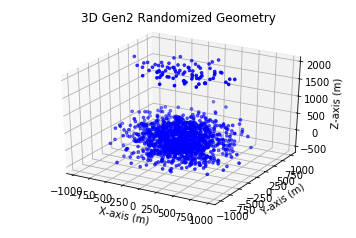

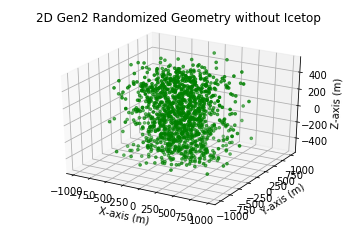

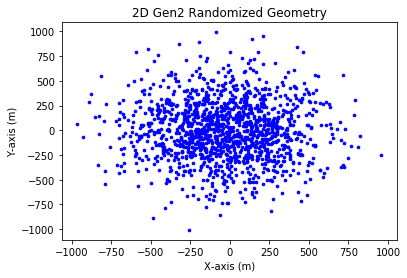

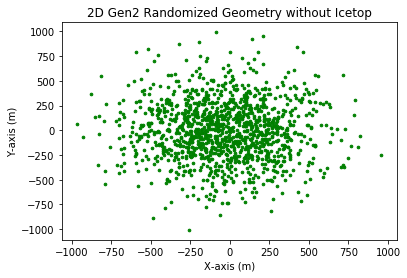

In [24]:
#using random.gauss()

ax8 = plt.axes(projection='3d')
ax8.set_xlabel('X-axis (m)')
ax8.set_ylabel('Y-axis (m)')
ax8.set_zlabel('Z-axis (m)')
ax8.set_title("3D Gen2 Randomized Geometry")
ax8.dist = 11
ax8.scatter3D(rand_dom_x_positions_3, rand_dom_y_positions_3, gen2_dom_z_positions, s =7, c='blue', depthshade=True)
plt.show()

#gen2 random x-y positions, z kept constant, without icetop
ax9 = plt.axes(projection='3d')
ax9.set_xlabel('X-axis (m)')
ax9.set_ylabel('Y-axis (m)')
ax9.set_zlabel('Z-axis (m)')
ax9.set_title("2D Gen2 Randomized Geometry without Icetop")
ax9.dist = 11
ax9.scatter3D(rand_dom_x_positions_3[:,0:61], rand_dom_y_positions_3[:,0:61], gen2_dom_z_positions[:,0:61],s =7, c='green', depthshade=True)
plt.show()

ax10 = plt.axes()
ax10.set_xlabel('X-axis (m)')
ax10.set_ylabel('Y-axis (m)')
ax10.set_title("2D Gen2 Randomized Geometry")
ax10.scatter(rand_dom_x_positions_3, rand_dom_y_positions_3, s =7, c='blue')
plt.show()

#gen2 positions without icetop
ax11 = plt.axes()
ax11.set_xlabel('X-axis (m)')
ax11.set_ylabel('Y-axis (m)')
ax11.set_title("2D Gen2 Randomized Geometry without Icetop") 
ax11.scatter(rand_dom_x_positions_3[:,0:61], rand_dom_y_positions_3[:,0:61], s =7, c='green')
plt.show()

## Creating x-y positions using a normal distribution based on the average and standard deviation of the original IceCube coordinates excluding Icetop

In [25]:
random.normalvariate(np.average(gen2_dom_x_positions[:,0:61]), np.std(gen2_dom_x_positions[:,0:61]))

-122.89662520702092

In [26]:
#using random.normalvariate()
#creates a (21,67) 2d array with randomized x positions in a the range of original IC coordinates 
index = 0
rand_x_positions_4 = []
for string_num in gen2_dom_x_positions:
    for dom_num in string_num:
        dom_num = random.normalvariate(np.average(gen2_dom_x_positions[:,0:61]), np.std(gen2_dom_x_positions[:,0:61]))
        rand_x_positions_4.insert(index, dom_num)
        index = index + 1
#splits the 1d list in to 21 sections of length 67 
splitedSize = 67
rand_dom_x_list_4 = [rand_x_positions_4[x:x+splitedSize] for x in range(0, len(rand_x_positions_4), splitedSize)]
#converts list to array
rand_dom_x_positions_4 = np.asarray(rand_dom_x_list_4)

print(len(rand_dom_x_positions_4))
print(len(rand_dom_x_positions_4[0]))
#print(rand_dom_x_positions_4)

21
67


In [27]:
#using random.normalvariate()
#creates a (21,67) 2d array with randomized y positions in a the range of original IC coordinates 
index = 0
rand_y_positions_4 = []
for string_num in gen2_dom_y_positions:
    for dom_num in string_num:
        dom_num = random.normalvariate(np.average(gen2_dom_y_positions[:,0:61]), np.std(gen2_dom_y_positions[:,0:61]))
        rand_y_positions_4.insert(index, dom_num)
        index = index + 1
#splits the 1d list in to 21 sections of length 67 
splitedSize = 67
rand_dom_y_list_4 = [rand_y_positions_4[y:y+splitedSize] for y in range(0, len(rand_y_positions_4), splitedSize)]
#converts list to array
rand_dom_y_positions_4 = np.asarray(rand_dom_y_list_4)

print(len(rand_dom_y_positions_4))
print(len(rand_dom_y_positions_4[0]))
#print(rand_dom_y_positions_4)

21
67


### a function that generates random x,y coordinates for each string using random.normalvariate()

In [28]:
#creates random x,y positions for each string
def normalvariate_random_string(coordinate_array, split):
    index = 0
    rand_normalvariate_positions = []
    for string_num in coordinate_array:
        string_num = random.normalvariate(np.average(coordinate_array), np.std(coordinate_array))
        rand_normalvariate_positions = np.insert(rand_normalvariate_positions,index, string_num)
        index = index + 1
        
    rand_normalvariate_positions = np.repeat(rand_normalvariate_positions, 67)    
    random_list = [rand_normalvariate_positions[x:x+split] for x in range(0, len(rand_normalvariate_positions), split)]
    rand_norm_positions = np.asarray(random_list)
    return rand_norm_positions

In [29]:
rand_x_positions = normalvariate_random_string(gen2_dom_x_positions, 67)
rand_y_positions = normalvariate_random_string(gen2_dom_y_positions, 67)
print(rand_x_positions)
print(len(rand_x_positions))
#print(type(rand_x_positions[1]))
print(len(rand_x_positions[0]))

[[ 104.93434743  104.93434743  104.93434743 ...  104.93434743
   104.93434743  104.93434743]
 [-188.47120455 -188.47120455 -188.47120455 ... -188.47120455
  -188.47120455 -188.47120455]
 [ -75.28308932  -75.28308932  -75.28308932 ...  -75.28308932
   -75.28308932  -75.28308932]
 ...
 [-152.97145387 -152.97145387 -152.97145387 ... -152.97145387
  -152.97145387 -152.97145387]
 [  76.39788292   76.39788292   76.39788292 ...   76.39788292
    76.39788292   76.39788292]
 [-273.93604628 -273.93604628 -273.93604628 ... -273.93604628
  -273.93604628 -273.93604628]]
21
67


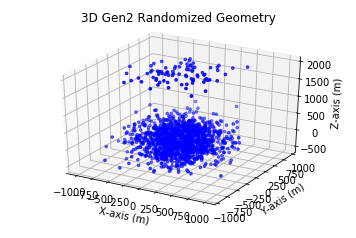

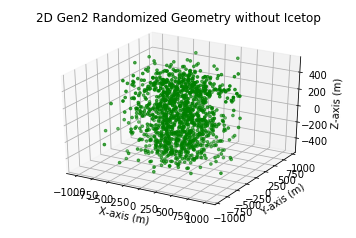

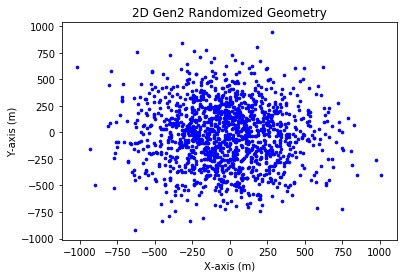

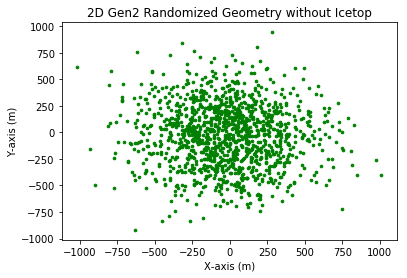

In [30]:
#using random.normalvariate()

ax12 = plt.axes(projection='3d')
ax12.set_xlabel('X-axis (m)')
ax12.set_ylabel('Y-axis (m)')
ax12.set_zlabel('Z-axis (m)')
ax12.set_title("3D Gen2 Randomized Geometry")
ax12.dist = 11
ax12.scatter3D(rand_dom_x_positions_4, rand_dom_y_positions_4, gen2_dom_z_positions, s =7, c='blue', depthshade=True)
plt.show()

#gen2 random x-y positions, z kept constant, without icetop
ax13 = plt.axes(projection='3d')
ax13.set_xlabel('X-axis (m)')
ax13.set_ylabel('Y-axis (m)')
ax13.set_zlabel('Z-axis (m)')
ax13.set_title("2D Gen2 Randomized Geometry without Icetop")
ax13.dist = 11
ax13.scatter3D(rand_dom_x_positions_4[:,0:61], rand_dom_y_positions_4[:,0:61], gen2_dom_z_positions[:,0:61],s =7, c='green', depthshade=True)
plt.show()

ax14 = plt.axes()
ax14.set_xlabel('X-axis (m)')
ax14.set_ylabel('Y-axis (m)')
ax14.set_title("2D Gen2 Randomized Geometry")
ax14.scatter(rand_dom_x_positions_4, rand_dom_y_positions_4, s =7, c='blue')
plt.show()

#gen2 positions without icetop
ax15 = plt.axes()
ax15.set_xlabel('X-axis (m)')
ax15.set_ylabel('Y-axis (m)')
ax15.set_title("2D Gen2 Randomized Geometry without Icetop") 
ax15.scatter(rand_dom_x_positions_4[:,0:61], rand_dom_y_positions_4[:,0:61], s =7, c='green')
plt.show()